In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2

In [56]:
data = pd.read_csv("Flights1_2019_1.csv")

In [57]:
data

,YEAR,DAY_OF_WEEK,FL_DATE,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST_CITY_NAME,DEST_STATE_ABR,DEP_DELAY,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15
0,2019,6,1/19/2019,13487,1348702,31650,"Minneapolis, MN",11193,1119302,33105,"Cincinnati, OH",KY,-10.0,1832.0,-25.0,0.0,0.0
1,2019,7,1/20/2019,13487,1348702,31650,"Minneapolis, MN",11193,1119302,33105,"Cincinnati, OH",KY,-4.0,1825.0,-37.0,0.0,0.0
2,2019,1,1/21/2019,13487,1348702,31650,"Minneapolis, MN",11193,1119302,33105,"Cincinnati, OH",KY,-9.0,1845.0,-17.0,0.0,0.0
3,2019,2,1/22/2019,13487,1348702,31650,"Minneapolis, MN",11193,1119302,33105,"Cincinnati, OH",KY,-4.0,1839.0,-23.0,0.0,0.0
4,2019,3,1/23/2019,13487,1348702,31650,"Minneapolis, MN",11193,1119302,33105,"Cincinnati, OH",KY,-6.0,1850.0,-12.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583980,2019,3,1/30/2019,14057,1405702,34057,"Portland, OR",13930,1393007,30977,"Chicago, IL",IL,-9.0,1225.0,-27.0,0.0,0.0
583981,2019,3,1/30/2019,13930,1393007,30977,"Chicago, IL",14908,1490803,32575,"Santa Ana, CA",CA,35.0,2230.0,17.0,17.0,1.0
583982,2019,3,1/30/2019,14635,1463502,31714,"Fort Myers, FL",13930,1393007,30977,"Chicago, IL",IL,132.0,2035.0,113.0,113.0,1.0
583983,2019,3,1/30/2019,11618,1161802,31703,"Newark, NJ",13930,1393007,30977,"Chicago, IL",IL,32.0,841.0,37.0,37.0,1.0


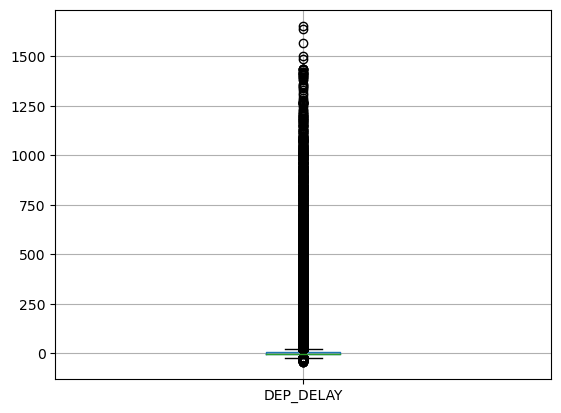

In [58]:
data.boxplot(column = 'DEP_DELAY')
plt.show()

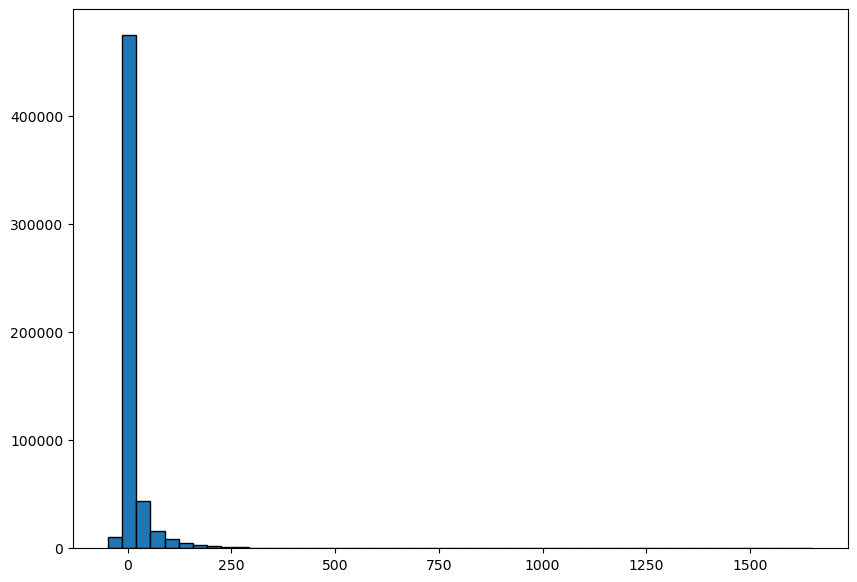

In [59]:
plt.figure(figsize=(10, 7))
plt.hist(data['DEP_DELAY'], bins=50, edgecolor='black')
plt.grid(False)
plt.show()

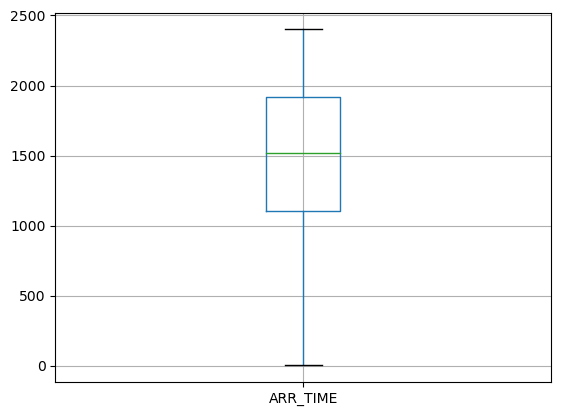

In [60]:
data.boxplot(column = 'ARR_TIME')
plt.show()

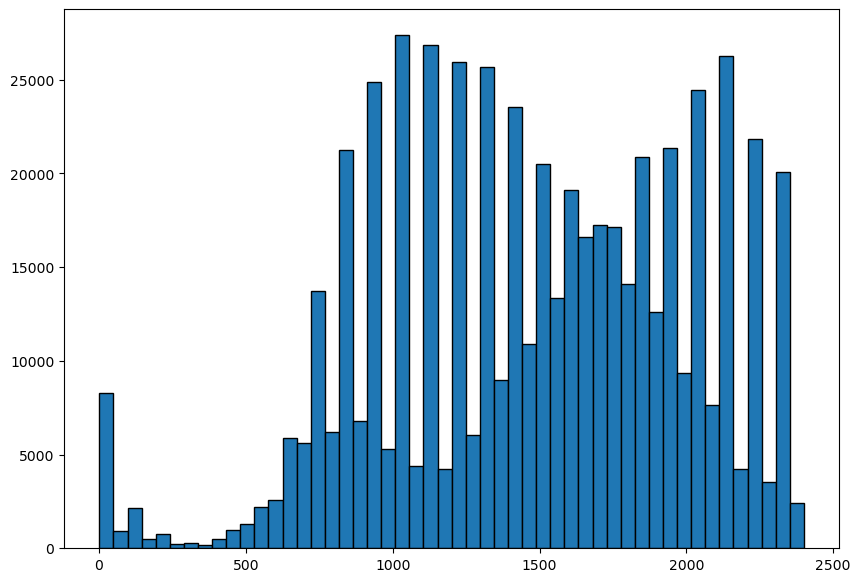

In [50]:
plt.figure(figsize=(10, 7))
plt.hist(data['ARR_TIME'], bins=50, edgecolor='black')
plt.grid(False)
plt.show()

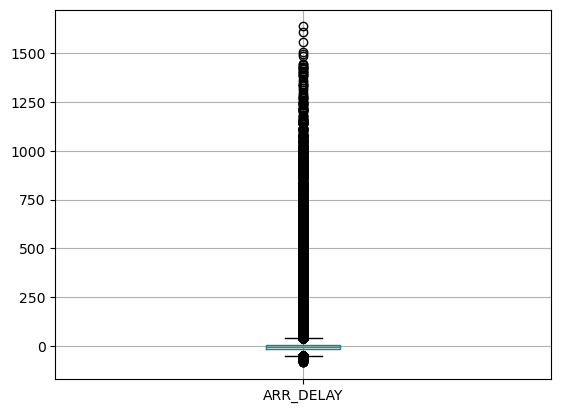

In [61]:
data.boxplot(column = 'ARR_DELAY')
plt.show()

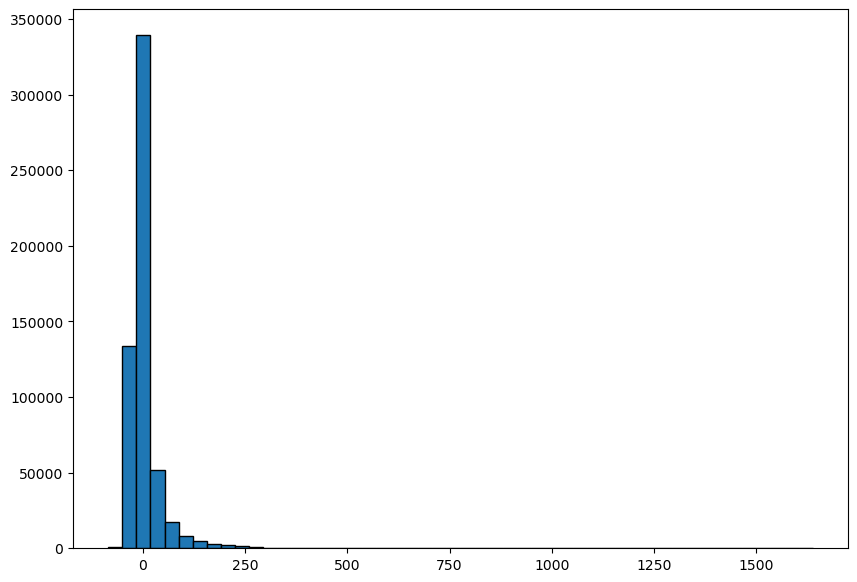

In [52]:
plt.figure(figsize=(10, 7))
plt.hist(data['ARR_DELAY'], bins=50, edgecolor='black')
plt.grid(False)
plt.show()

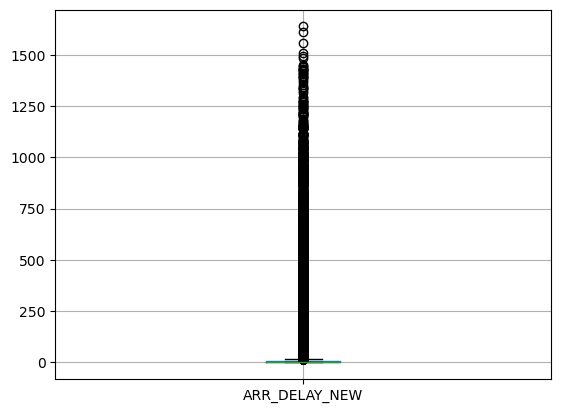

In [53]:
data.boxplot(column = 'ARR_DELAY_NEW')
plt.show()

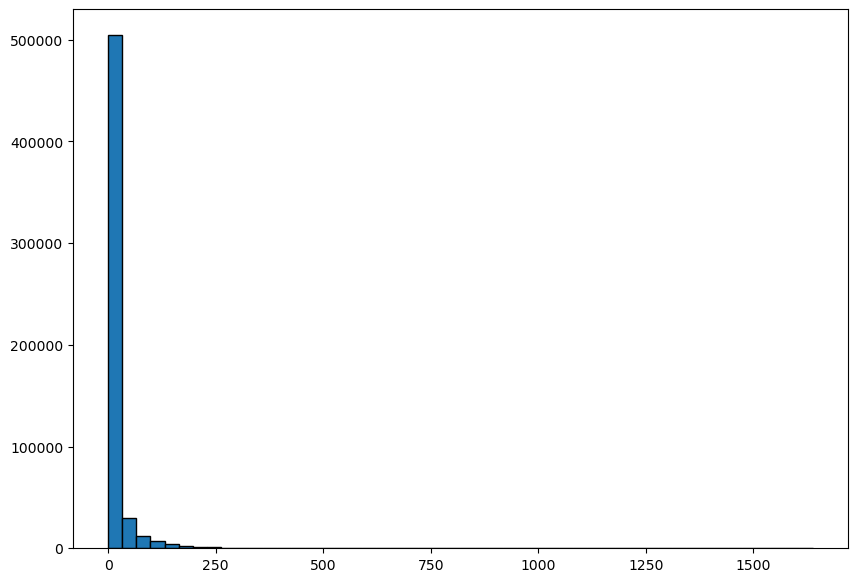

In [54]:
plt.figure(figsize=(10, 7))
plt.hist(data['ARR_DELAY_NEW'], bins=50, edgecolor='black')
plt.grid(False)
plt.show()

In [63]:
# Calculate the IQR (Interquartile Range)
Q1 = data['DEP_DELAY'].quantile(0.25)
Q3 = data['DEP_DELAY'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['DEP_DELAY'] < lower_bound) | (data['DEP_DELAY'] > upper_bound)]

# Count the number of outliers
len(outliers)

80032

In [64]:
# Calculate the IQR (Interquartile Range)
Q1 = data['ARR_DELAY'].quantile(0.25)
Q3 = data['ARR_DELAY'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['ARR_DELAY'] < lower_bound) | (data['ARR_DELAY'] > upper_bound)]

# Count the number of outliers
len(outliers)

50685

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
reduced_data = data[['DEP_DELAY', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW']].dropna()
reduced_data

,DEP_DELAY,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW
0,-10.0,1832.0,-25.0,0.0
1,-4.0,1825.0,-37.0,0.0
2,-9.0,1845.0,-17.0,0.0
3,-4.0,1839.0,-23.0,0.0
4,-6.0,1850.0,-12.0,0.0
...,...,...,...,...
583979,256.0,1439.0,239.0,239.0
583980,-9.0,1225.0,-27.0,0.0
583981,35.0,2230.0,17.0,17.0
583982,132.0,2035.0,113.0,113.0


In [14]:
#https://builtin.com/machine-learning/pca-in-python

features = ['DEP_DELAY', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW']

x = reduced_data.loc[:, features].values
x

array([[ -10., 1832.,  -25.,    0.],
       [  -4., 1825.,  -37.,    0.],
       [  -9., 1845.,  -17.,    0.],
       ...,
       [  35., 2230.,   17.,   17.],
       [ 132., 2035.,  113.,  113.],
       [  32.,  841.,   37.,   37.]])

In [15]:
#y = reduced_data[:, ['target']].values

x_scaled = StandardScaler().fit_transform(x)
x_scaled

array([[-0.4064454 ,  0.66463906, -0.57188843, -0.28753147],
       [-0.28252852,  0.65125405, -0.80644913, -0.28753147],
       [-0.38579258,  0.68949692, -0.41551463, -0.28753147],
       ...,
       [ 0.52293119,  1.42567203,  0.24907402,  0.07044729],
       [ 2.52625406,  1.05280412,  2.12555962,  2.09197441],
       [ 0.46097275, -1.23029481,  0.64000852,  0.49159877]])

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x_scaled)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [17]:
principalDf

,principal component 1,principal component 2
0,-0.721967,-0.672168
1,-0.786137,-0.659181
2,-0.619564,-0.696448
3,-0.627941,-0.685050
4,-0.527413,-0.705500
...,...,...
565958,8.323510,0.191757
565959,-0.747415,0.488282
565960,0.503574,-1.421984
565961,3.905773,-1.005212


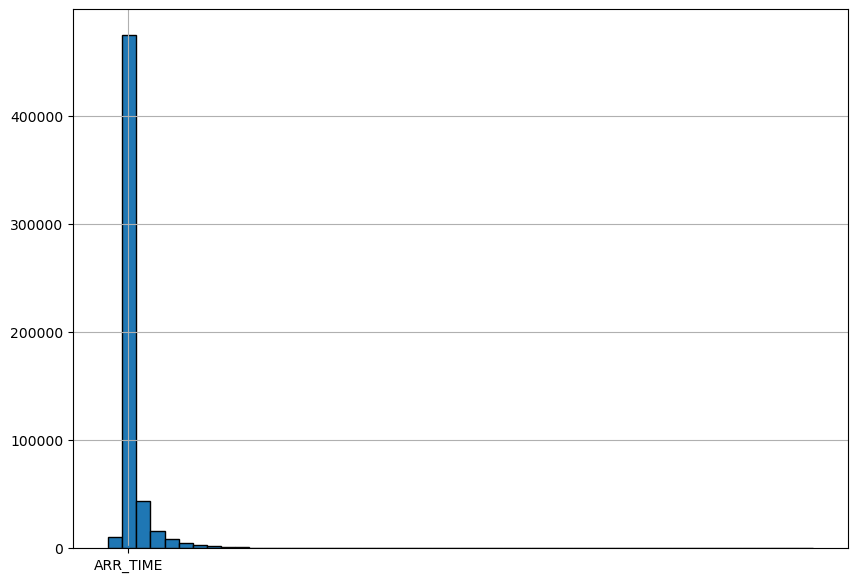

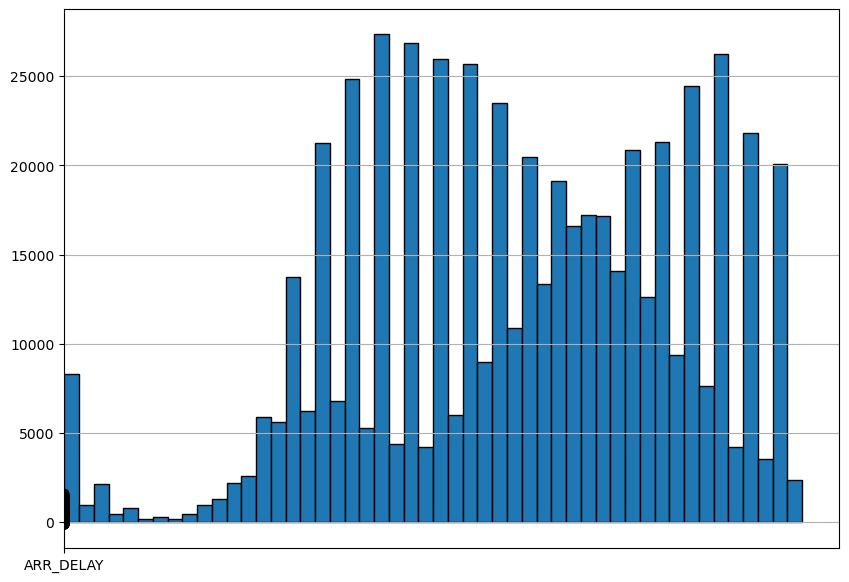

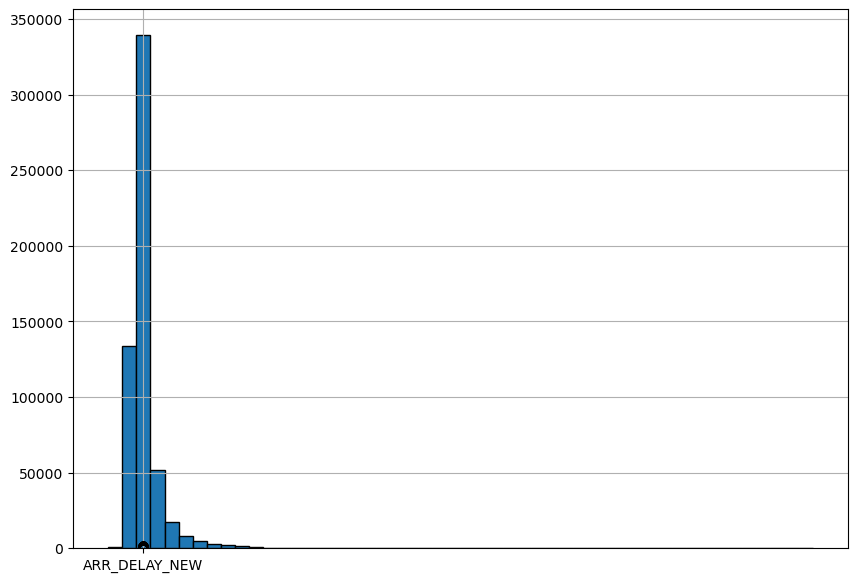

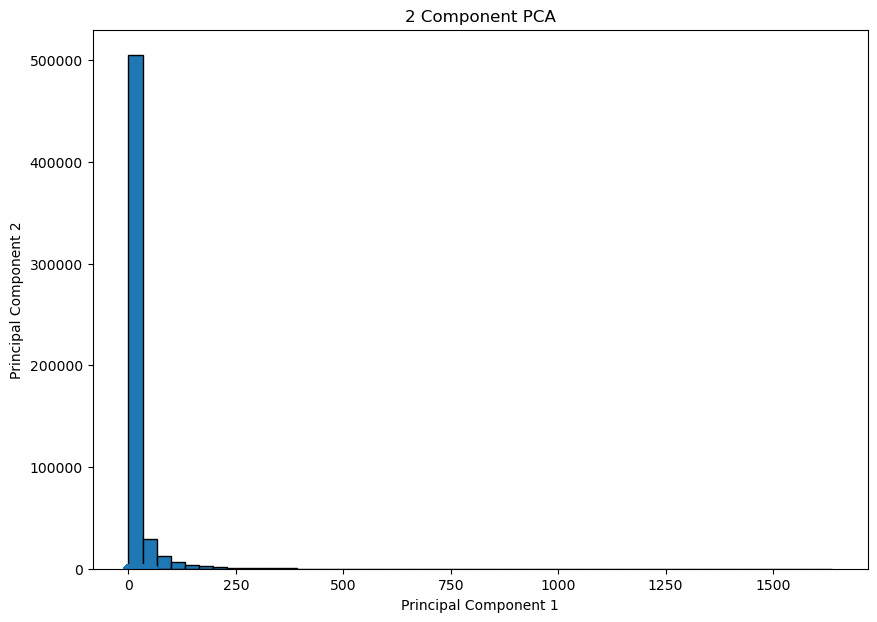

In [18]:
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA')

plt.show()

In [19]:
principalDf.head(50)

,principal component 1,principal component 2
0,-0.721967,-0.672168
1,-0.786137,-0.659181
2,-0.619564,-0.696448
3,-0.627941,-0.685050
4,-0.527413,-0.705500
5,0.000547,-0.807021
6,-0.487084,-0.690034
7,-0.412199,-0.706779
8,-0.730807,-0.672240
9,7.656874,-1.367009


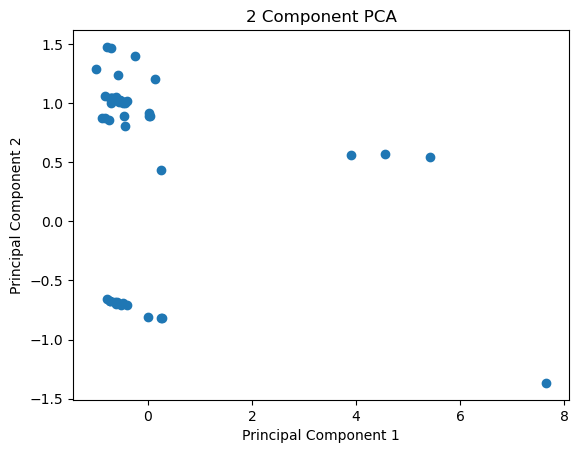

In [20]:
plt.scatter(principalDf['principal component 1'].iloc[:50], principalDf['principal component 2'].iloc[:50], marker='o')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA')

plt.show()

In [21]:
mean_data = data.groupby('ORIGIN_AIRPORT_ID').agg({
    'DEP_DELAY': 'mean',
    'ARR_TIME': 'mean',
    'ARR_DELAY': 'mean',
    'ARR_DELAY_NEW': 'mean'
}).reset_index()

var_data = data.groupby('ORIGIN_AIRPORT_ID').agg({
    'DEP_DELAY': 'var',
    'ARR_TIME': 'var',
    'ARR_DELAY': 'var',
    'ARR_DELAY_NEW': 'var'
}).reset_index()

# Merge the two DataFrames on 'ORIGIN_AIRPORT_ID'
grouped_data = pd.merge(mean_data, var_data, on='ORIGIN_AIRPORT_ID', suffixes=('_mean', '_var'))

grouped_data.columns = ['ORIGIN_AIRPORT_ID', 
                        'AVG_DEP_DELAY', 'AVG_ARR_TIME', 'AVG_ARR_DELAY', 'AVG_ARR_DELAY_NEW',
                        'VAR_DEP_DELAY', 'VAR_ARR_TIME', 'VAR_ARR_DELAY', 'VAR_ARR_DELAY_NEW']

grouped_data

,ORIGIN_AIRPORT_ID,AVG_DEP_DELAY,AVG_ARR_TIME,AVG_ARR_DELAY,AVG_ARR_DELAY_NEW,VAR_DEP_DELAY,VAR_ARR_TIME,VAR_ARR_DELAY,VAR_ARR_DELAY_NEW
0,10135,12.208723,1395.965732,8.221184,17.922118,2998.078174,251233.795697,3027.429050,2570.809540
1,10136,5.428571,1143.964286,8.273810,14.083333,1930.557742,159486.585543,2048.703023,1829.645709
2,10140,3.961062,1373.844064,-2.106446,8.136014,1012.800136,204162.537135,1191.467953,932.603974
3,10141,9.983333,1048.483333,4.916667,14.650000,3467.237006,163396.559040,3271.772599,2861.485593
4,10146,2.783133,1235.036145,-5.108434,6.759036,763.586541,190635.523068,872.610050,643.624155
...,...,...,...,...,...,...,...,...,...
341,15624,3.480573,1389.805328,-1.014344,9.579918,1482.459150,165183.861409,1596.621970,1302.777994
342,15841,11.913793,1422.696429,13.625000,22.392857,4517.939806,119359.633442,4715.220455,4239.879221
343,15919,9.654492,1428.973346,7.705534,16.262846,2248.319241,222448.711739,2406.449307,2036.417491
344,15991,-1.218182,1576.100000,-8.100000,8.080000,3609.914478,101756.214286,920.867347,445.503673


In [22]:
# dep delay average in the whole dataset is 9.679905
# arr delay average in the whole dataset is 4.257506

count_10_or_more = lambda x: (x >= 9.679905).sum() # counts how many flights are 10 or more minutes delayed
count_5_or_more = lambda x: (x >= 4.257506).sum() # counts how many flights are 5 or more minutes delayed

def count_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return ((series < lower_bound) | (series > upper_bound)).sum()

grouped_data = data.groupby('ORIGIN_AIRPORT_ID').agg({
    'DEP_DELAY': ['mean', 'var', 'max', 'min', 'count', count_10_or_more, count_outliers],
    'ARR_TIME': ['mean', 'var', 'max', 'min'],
    'ARR_DELAY': ['mean', 'var', 'max', 'min', 'count', count_5_or_more, count_outliers]
}).reset_index()

grouped_data.columns = ['_'.join(col).strip() for col in grouped_data.columns.values]

grouped_data.columns = ['ORIGIN_AIRPORT_ID', 
                        'AVG_DEP_DELAY', 'VAR_DEP_DELAY', 'MAX_DEP_DELAY', 'MIN_DEP_DELAY', 'COUNT_DEP_DELAY', 'COUNT_DEP_DELAY_10_OR_MORE', 'OUTLIERS_DEP_DELAY',
                        'AVG_ARR_TIME', 'VAR_ARR_TIME', 'MAX_ARR_TIME', 'MIN_ARR_TIME',
                        'AVG_ARR_DELAY', 'VAR_ARR_DELAY', 'MAX_ARR_DELAY', 'MIN_ARR_DELAY', 'COUNT_ARR_DELAY', 'COUNT_ARR_DELAY_5_OR_MORE', 'OUTLIERS_ARR_DELAY']

grouped_data['PROPORTION_COUNT_DEP_DELAY_10_OR_MORE'] = grouped_data['COUNT_DEP_DELAY_10_OR_MORE'] / grouped_data['COUNT_DEP_DELAY']
grouped_data['PROPORTION_OUTLIERS_DEP_DELAY'] = grouped_data['OUTLIERS_DEP_DELAY'] / grouped_data['COUNT_DEP_DELAY']

grouped_data['PROPORTION_COUNT_ARR_DELAY_5_OR_MORE'] = grouped_data['COUNT_ARR_DELAY_5_OR_MORE'] / grouped_data['COUNT_ARR_DELAY']
grouped_data['PROPORTION_OUTLIERS_ARR_DELAY'] = grouped_data['OUTLIERS_ARR_DELAY'] / grouped_data['COUNT_ARR_DELAY']

grouped_data

,ORIGIN_AIRPORT_ID,AVG_DEP_DELAY,VAR_DEP_DELAY,MAX_DEP_DELAY,MIN_DEP_DELAY,COUNT_DEP_DELAY,COUNT_DEP_DELAY_10_OR_MORE,OUTLIERS_DEP_DELAY,AVG_ARR_TIME,VAR_ARR_TIME,...,VAR_ARR_DELAY,MAX_ARR_DELAY,MIN_ARR_DELAY,COUNT_ARR_DELAY,COUNT_ARR_DELAY_5_OR_MORE,OUTLIERS_ARR_DELAY,PROPORTION_COUNT_DEP_DELAY_10_OR_MORE,PROPORTION_OUTLIERS_DEP_DELAY,PROPORTION_COUNT_ARR_DELAY_5_OR_MORE,PROPORTION_OUTLIERS_ARR_DELAY
0,10135,12.208723,2998.078174,350.0,-28.0,321,62,43,1395.965732,251233.795697,...,3027.429050,331.0,-48.0,321,96,33,0.193146,0.133956,0.299065,0.102804
1,10136,5.428571,1930.557742,453.0,-15.0,168,24,24,1143.964286,159486.585543,...,2048.703023,432.0,-29.0,168,63,10,0.142857,0.142857,0.375000,0.059524
2,10140,3.961062,1012.800136,583.0,-23.0,1695,254,224,1373.844064,204162.537135,...,1191.467953,588.0,-49.0,1691,355,118,0.149853,0.132153,0.209935,0.069781
3,10141,9.983333,3467.237006,318.0,-13.0,60,11,7,1048.483333,163396.559040,...,3271.772599,299.0,-41.0,60,16,5,0.183333,0.116667,0.266667,0.083333
4,10146,2.783133,763.586541,153.0,-14.0,83,12,12,1235.036145,190635.523068,...,872.610050,166.0,-26.0,83,12,5,0.144578,0.144578,0.144578,0.060241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,15624,3.480573,1482.459150,402.0,-21.0,489,70,59,1389.805328,165183.861409,...,1596.621970,395.0,-42.0,488,103,37,0.143149,0.120654,0.211066,0.075820
342,15841,11.913793,4517.939806,314.0,-28.0,58,14,8,1422.696429,119359.633442,...,4715.220455,323.0,-30.0,56,18,6,0.241379,0.137931,0.321429,0.107143
343,15919,9.654492,2248.319241,435.0,-27.0,1013,197,179,1428.973346,222448.711739,...,2406.449307,427.0,-52.0,1012,300,105,0.194472,0.176703,0.296443,0.103755
344,15991,-1.218182,3609.914478,370.0,-47.0,55,10,5,1576.100000,101756.214286,...,920.867347,104.0,-51.0,50,10,3,0.181818,0.090909,0.200000,0.060000


In [23]:
grouped_data.to_csv('grouped_data.csv', index=False)

In [24]:
grouped_data_v2 = grouped_data.drop(columns = ['COUNT_DEP_DELAY', 'COUNT_DEP_DELAY_10_OR_MORE', 'COUNT_ARR_DELAY', 'COUNT_ARR_DELAY_5_OR_MORE'])
grouped_data_v2

,ORIGIN_AIRPORT_ID,AVG_DEP_DELAY,VAR_DEP_DELAY,MAX_DEP_DELAY,MIN_DEP_DELAY,OUTLIERS_DEP_DELAY,AVG_ARR_TIME,VAR_ARR_TIME,MAX_ARR_TIME,MIN_ARR_TIME,AVG_ARR_DELAY,VAR_ARR_DELAY,MAX_ARR_DELAY,MIN_ARR_DELAY,OUTLIERS_ARR_DELAY,PROPORTION_COUNT_DEP_DELAY_10_OR_MORE,PROPORTION_OUTLIERS_DEP_DELAY,PROPORTION_COUNT_ARR_DELAY_5_OR_MORE,PROPORTION_OUTLIERS_ARR_DELAY
0,10135,12.208723,2998.078174,350.0,-28.0,43,1395.965732,251233.795697,2314.0,3.0,8.221184,3027.429050,331.0,-48.0,33,0.193146,0.133956,0.299065,0.102804
1,10136,5.428571,1930.557742,453.0,-15.0,24,1143.964286,159486.585543,2047.0,539.0,8.273810,2048.703023,432.0,-29.0,10,0.142857,0.142857,0.375000,0.059524
2,10140,3.961062,1012.800136,583.0,-23.0,224,1373.844064,204162.537135,2349.0,5.0,-2.106446,1191.467953,588.0,-49.0,118,0.149853,0.132153,0.209935,0.069781
3,10141,9.983333,3467.237006,318.0,-13.0,7,1048.483333,163396.559040,1522.0,547.0,4.916667,3271.772599,299.0,-41.0,5,0.183333,0.116667,0.266667,0.083333
4,10146,2.783133,763.586541,153.0,-14.0,12,1235.036145,190635.523068,2054.0,710.0,-5.108434,872.610050,166.0,-26.0,5,0.144578,0.144578,0.144578,0.060241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,15624,3.480573,1482.459150,402.0,-21.0,59,1389.805328,165183.861409,2321.0,154.0,-1.014344,1596.621970,395.0,-42.0,37,0.143149,0.120654,0.211066,0.075820
342,15841,11.913793,4517.939806,314.0,-28.0,8,1422.696429,119359.633442,2233.0,1044.0,13.625000,4715.220455,323.0,-30.0,6,0.241379,0.137931,0.321429,0.107143
343,15919,9.654492,2248.319241,435.0,-27.0,179,1428.973346,222448.711739,2340.0,3.0,7.705534,2406.449307,427.0,-52.0,105,0.194472,0.176703,0.296443,0.103755
344,15991,-1.218182,3609.914478,370.0,-47.0,5,1576.100000,101756.214286,2118.0,1216.0,-8.100000,920.867347,104.0,-51.0,3,0.181818,0.090909,0.200000,0.060000


In [25]:
grouped_data_v2.to_csv('grouped_data_v2.csv', index=False)

In [26]:
grouped_data_v2.columns

Index(['ORIGIN_AIRPORT_ID', 'AVG_DEP_DELAY', 'VAR_DEP_DELAY', 'MAX_DEP_DELAY',
       'MIN_DEP_DELAY', 'OUTLIERS_DEP_DELAY', 'AVG_ARR_TIME', 'VAR_ARR_TIME',
       'MAX_ARR_TIME', 'MIN_ARR_TIME', 'AVG_ARR_DELAY', 'VAR_ARR_DELAY',
       'MAX_ARR_DELAY', 'MIN_ARR_DELAY', 'OUTLIERS_ARR_DELAY',
       'PROPORTION_COUNT_DEP_DELAY_10_OR_MORE',
       'PROPORTION_OUTLIERS_DEP_DELAY', 'PROPORTION_COUNT_ARR_DELAY_5_OR_MORE',
       'PROPORTION_OUTLIERS_ARR_DELAY'],
      dtype='object')

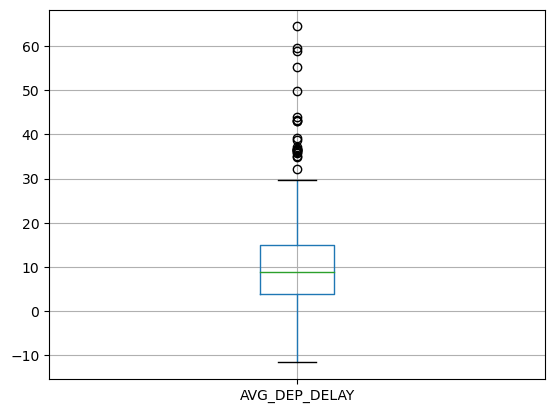

In [27]:
grouped_data_v2.boxplot(column = 'AVG_DEP_DELAY')
plt.show()

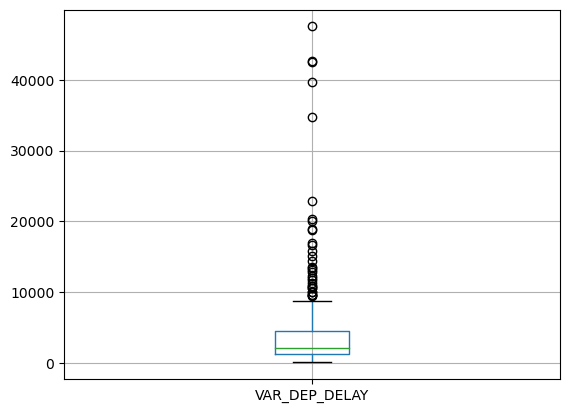

In [28]:
grouped_data_v2.boxplot(column = 'VAR_DEP_DELAY')
plt.show()

In [29]:
#https://builtin.com/machine-learning/pca-in-python

features_grouped_data_v2 = ['AVG_DEP_DELAY', 'VAR_DEP_DELAY', 'MAX_DEP_DELAY', 'MIN_DEP_DELAY', 'OUTLIERS_DEP_DELAY', 
                            'AVG_ARR_TIME', 'VAR_ARR_TIME', 'MAX_ARR_TIME', 'MIN_ARR_TIME', 
                            'AVG_ARR_DELAY', 'VAR_ARR_DELAY', 'MAX_ARR_DELAY', 'MIN_ARR_DELAY', 'OUTLIERS_ARR_DELAY',
                            'PROPORTION_COUNT_DEP_DELAY_10_OR_MORE', 'PROPORTION_OUTLIERS_DEP_DELAY', 
                            'PROPORTION_COUNT_ARR_DELAY_5_OR_MORE', 'PROPORTION_OUTLIERS_ARR_DELAY']

x_grouped_data_v2 = grouped_data_v2.loc[:, features_grouped_data_v2].values
x_grouped_data_v2

array([[ 1.22087227e+01,  2.99807817e+03,  3.50000000e+02, ...,
         1.33956386e-01,  2.99065421e-01,  1.02803738e-01],
       [ 5.42857143e+00,  1.93055774e+03,  4.53000000e+02, ...,
         1.42857143e-01,  3.75000000e-01,  5.95238095e-02],
       [ 3.96106195e+00,  1.01280014e+03,  5.83000000e+02, ...,
         1.32153392e-01,  2.09934950e-01,  6.97811946e-02],
       ...,
       [ 9.65449161e+00,  2.24831924e+03,  4.35000000e+02, ...,
         1.76702863e-01,  2.96442688e-01,  1.03754941e-01],
       [-1.21818182e+00,  3.60991448e+03,  3.70000000e+02, ...,
         9.09090909e-02,  2.00000000e-01,  6.00000000e-02],
       [-7.56521739e-01,  7.41010374e+02,  2.67000000e+02, ...,
         8.69565217e-02,  1.47826087e-01,  6.08695652e-02]])

In [30]:
x_grouped_data_v2_scaled = StandardScaler().fit_transform(x_grouped_data_v2) #scaling everything but maybe not for proportion
x_grouped_data_v2_scaled

array([[ 0.12040605, -0.16728598, -0.60189492, ...,  0.12724027,
         0.17163195,  0.48559612],
       [-0.46375846, -0.34914999, -0.36411273, ...,  0.37583274,
         0.93880326, -0.90070442],
       [-0.59019619, -0.50550023, -0.06399929, ...,  0.07688379,
        -0.72885819, -0.57214985],
       ...,
       [-0.09966148, -0.29501577, -0.4056669 , ...,  1.32112218,
         0.14513433,  0.51606411],
       [-1.03642965, -0.06305284, -0.55572362, ..., -1.07504332,
        -0.82923155, -0.88545155],
       [-0.99665393, -0.55180264, -0.79350581, ..., -1.18543607,
        -1.35634751, -0.85759848]])

In [31]:
pca_grouped_data_v2 = PCA(n_components=2)

principalComponents_grouped_data_v2 = pca_grouped_data_v2.fit_transform(x_grouped_data_v2_scaled)

principalDf_grouped_data_v2 = pd.DataFrame(data = principalComponents_grouped_data_v2, 
                                           columns = ['principal component 1', 'principal component 2'])

In [32]:
principalDf_grouped_data_v2

,principal component 1,principal component 2
0,0.178252,0.138847
1,-1.662394,-1.189216
2,-0.700650,1.489812
3,-2.249048,-1.691880
4,-3.138724,-0.468467
...,...,...
341,-1.387647,0.667790
342,-0.663683,-1.747228
343,0.445357,0.599112
344,-2.264737,0.856318


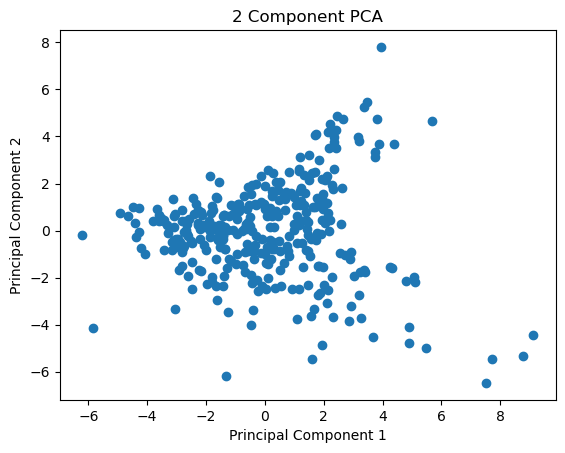

In [33]:
plt.scatter(principalDf_grouped_data_v2['principal component 1'], principalDf_grouped_data_v2['principal component 2'])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA')

plt.show()

In [34]:
# Mahanalobis Outlier Detection

# Step 2: Calculate covariance matrix and its inverse
covariance_matrix = np.cov(principalDf_grouped_data_v2, rowvar=False)
inverse_covariance_matrix = np.linalg.inv(covariance_matrix)
inverse_covariance_matrix

array([[ 1.79005277e-01, -3.94384926e-17],
       [-3.94384926e-17,  2.43471439e-01]])

In [35]:
mean_vector = principalDf_grouped_data_v2.mean().values
mean_vector

array([-9.75456068e-17, -3.08038758e-17])

In [38]:
diff = pd.DataFrame(columns = ['pc1 difference', 'pc2 difference'])
diff['pc1 difference'] = principalDf_grouped_data_v2['principal component 1'] - mean_vector[0]
diff['pc2 difference'] = principalDf_grouped_data_v2['principal component 2'] - mean_vector[1]
diff

,pc1 difference,pc2 difference
0,0.178252,0.138847
1,-1.662394,-1.189216
2,-0.700650,1.489812
3,-2.249048,-1.691880
4,-3.138724,-0.468467
...,...,...
341,-1.387647,0.667790
342,-0.663683,-1.747228
343,0.445357,0.599112
344,-2.264737,0.856318


In [39]:
# Step 3: Calculate Mahalanobis distances
mahalanobis_distances = np.dot(np.dot(diff, inverse_covariance_matrix), diff.T)
mahalanobis_distances

array([[ 0.01038145, -0.09324558,  0.02800706, ...,  0.03446364,
        -0.04331544, -0.06665567],
       [-0.09324558,  0.83901627, -0.22286264, ..., -0.30599514,
         0.42599618,  0.63393428],
       [ 0.02800706, -0.22286264,  0.62827007, ...,  0.16145737,
         0.59465279,  0.49889252],
       ...,
       [ 0.03446364, -0.30599514,  0.16145737, ...,  0.122895  ,
        -0.05563934, -0.13718575],
       [-0.04331544,  0.42599618,  0.59465279, ..., -0.05563934,
         1.0966572 ,  1.15182711],
       [-0.06665567,  0.63393428,  0.49889252, ..., -0.13718575,
         1.15182711,  1.26141765]])

In [40]:
# Step 4: Set a threshold based on chi-squared distribution
# The degrees of freedom is the number of features in your DataFrame
threshold = chi2.ppf(0.95, principalDf_grouped_data_v2.shape[1])

# Identify outliers
outliers = mahalanobis_distances > threshold
outliers

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [41]:
# Display the outliers
outlier_indices = np.where(outliers)[0]
print("Outlier indices:", outlier_indices)
print("Outlier data points:")
print(principalDf_grouped_data_v2.loc[outlier_indices])

Outlier indices: [  6   6   6   6   6   6  16  16  16  16  17  18  18  18  18  18  19  19
  19  19  19  19  19  19  19  19  19  19  19  19  19  19  19  19  19  19
  19  19  19  19  19  19  30  30  30  37  37  37  37  37  37  41  41  41
  41  41  41  41  41  50  50  53  53  53  64  64  64  64  64  64  64  64
  64  64  64  64  64  64  64  68  68  68  68  68  68  68  68  68  68  68
  68  82  82  82  82  82  82  82  82  82  82  82  87  87  87  87  87  88
  88  88  88  88  88  88  88  88  88  88  88  89  89  89  89  89  89  89
  89  89  89  89  89  89  89  89  89  89  89  89  89  89  89  91  91  95
  95  95  95  95  95  95  95  95  95  95  95  95  95  95  95  95  96  96
  96  96  96  96  96  96  96  96  96  96  96  96  96  96  96  96  96 100
 100 100 100 105 105 105 105 105 105 105 105 109 109 109 109 109 112 112
 112 112 122 122 122 141 141 141 141 141 141 141 141 141 141 141 154 155
 155 155 155 156 156 156 156 156 160 160 160 160 160 160 160 160 160 160
 160 160 160 160 160 160 160 160 1